# Try Top2Vec

Bruno said this is a good one that works pretty much out of the box. Their team has used this a couple times with success.

https://github.com/ddangelov/Top2Vec


## Installs, mounts, and imports

In [ ]:
!pip install top2vec

     |████████████████████████████████| 24.1 MB 1.3 MB/s 
     |████████████████████████████████| 5.2 MB 40.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 88 kB 6.5 MB/s 
     |████████████████████████████████| 1.1 MB 53.8 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2330847 sha256=13f294ed87999d9e588f7038baee7ee419f4079bbcf44b5a082fc1f8854abd95
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef4a71e896b62f5161f2bc8a14c97a
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=49bc19df59d77e2521b54958aed825dffeb2a3636e4715f55e913cff48735a44
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=1594b0161dd

In [ ]:
!pip install top2vec[sentence_encoders]

     |████████████████████████████████| 4.9 MB 5.1 MB/s 
     |████████████████████████████████| 462 kB 43.1 MB/s 


In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Colab Notebooks/fourthbrain/Week 13')

Mounted at /content/drive


In [ ]:
import numpy as np 
import pandas as pd 
import json
import os
import ipywidgets as widgets
from IPython.display import clear_output, display
from top2vec import Top2Vec
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', 140)

## Load `health_tech.csv`

In [ ]:
df = pd.read_csv('health_tech.csv')

In [ ]:
docs = df.article_clean.values

## Train the model with `universal-sentence-encoder` embedding (~11 min)

In [ ]:
model = Top2Vec(docs, embedding_model='universal-sentence-encoder')

2022-05-10 16:13:58,967 - top2vec - INFO - Pre-processing documents for training
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
2022-05-10 16:17:09,241 - top2vec - INFO - Downloading universal-sentence-encoder model
2022-05-10 16:17:25,012 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-05-10 16:22:49,086 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  war

### Save model

In [ ]:
model.save('top2vec.univ-sent-enco.t2v')

## Take a look around

In [ ]:
print('Num topics:', model.get_num_topics())

Num topics: 850


In [ ]:
topic_sizes, topic_idx = model.get_topic_sizes()
print(pd.DataFrame(topic_sizes).rename(columns={0: 'Number of docs per topic'}).describe())

       Number of docs per topic
count                850.000000
mean                 152.567059
std                  186.559068
min                   16.000000
25%                   58.000000
50%                   96.000000
75%                  174.750000
max                 2371.000000


### Top 20 topics with most members

In [ ]:
topic_words, word_scores, topic_idx = model.get_topics(20)
for i, x in enumerate(topic_words):
    print(i, '-'.join(x))

0 reuters-xinhua-cancelled-twtr-closes-wsj-closings-canceled-hedging-closing-layoffs-coverage-tsla-fsa-news-nyse-discontinuing-halted-boycott-tianjin-cancelling-icahn-ticker-okcoin-sidelined-shutting-stockholders-bitfinex-selloff-intraday-layoff-unconfirmed-canceling-outage-unilever-complicit-rescheduled-shelved-shutdowns-nikkei-nvda-planned-etf-cnbc-breakeven-affected-cme-reschedule-bearish-volatility
1 yuan-xinhua-tianjin-rmb-baidu-guo-weibo-jiang-shanghai-reuters-china-prc-peking-beijing-chinese-guangzhou-renminbi-hk-sichuan-guangdong-suzhou-okcoin-hong-xinjiang-uighurs-jia-alibaba-huang-tencent-cheng-liang-fujian-shenzhen-hangzhou-shandong-wechat-taiwanese-hainan-huobi-chengdu-wuhan-mandarin-zhengzhou-cnbc-liao-zhang-yunnan-jinping-nanjing-nyse
2 reuters-coverage-newsroom-jazeera-paywall-news-akanksha-aetna-wsj-insured-hedging-bezos-assurance-insure-assurances-covered-cbs-insurance-insurer-insurers-newsworthy-aig-underwriting-rightly-journalistic-nytimes-antibody-subsidizing-press-

### Top 100 topics of "technology"

In [ ]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=['technology'], num_topics=100)
for i, x in zip(topic_nums, topic_words):
    print(i, '-'.join(x))

144 techcrunch-wiretapping-engadget-technologies-technologically-technological-smartphones-nanotechnology-wearables-misusing-smartwatches-ifttt-innovating-googlers-microblogging-tweeting-wearable-technology-environmentally-waze-iot-evernote-driverless-eavesdrop-inventions-smartphone-ubiquitous-eavesdropping-overuse-utilizes-mashable-telegram-utilizing-quora-zuckerberg-computerized-podcasting-nielsen-bezos-invented-handheld-usefulness-selfies-influencers-remotely-gadgets-unfollow-breakthroughs-technica-rudimentary
146 smartwatches-iot-innovating-wearables-hoverboards-irobot-driverless-hololens-gadgets-homekit-innovate-revolutionize-haptic-innovative-graphene-hoverboard-futuristic-smartwatch-innovator-robotic-inventors-techcrunch-consumers-engadget-vr-smartthings-gadget-inventions-oled-devices-jony-tsla-hmd-invent-technologies-alexa-nanotechnology-darpa-breakthroughs-appliances-wearable-roomba-innovators-augmented-tizen-robots-smartphones-innovations-fitbit-demoed
283 driverless-irobot-e

### Top 10 articles by keywords ['automated', 'metadata', 'tagging', 'topic', 'modeling']

In [ ]:
documents, document_scores, document_ids = model.search_documents_by_keywords(
    keywords=['automated', 'metadata', 'tagging', 'topic', 'modeling'],
    num_docs=10
)
doc_list = []
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    doc_list.append({'id': doc_id, 'score': score, 'doc': doc})
pd.set_option('display.max_colwidth', 999)
pd.DataFrame(doc_list, columns=['id', 'score', 'doc'])

,id,score,doc
0,39082,0.317908,cnn
1,77105,0.227008,is expanding the use of its facial recognition technology to alert users when photo of them is posted even if they re not tagged the idea is to round up photos posted by friends that you might want to add to your profile and to detect when someone else is using your photos as their own the setting is optional and tied into your current use of the site facial recognition software which suggests friends to tag in your photos if you ve got that feature turned on then you would get these new alerts unless you opt out you re in control of your image on facebook and can make choices such as whether to tag yourself leave yourself untagged or reach out to the person who posted the photo if you have concerns about it the company said in statement the alerts notify users when friend or someone in their broader network posts photo that might include you and then offers options to ignore the photo tag themselves mark that it not them or report the photo
2,4948,0.226772,ai glossary is semi regular column diving into the oft misunderstood fields of machine learning and artificial intelligence by way of their frequently imperfect jargon in press session held at recent ai centric computing conference one dude in particular was just not getting it how are deep learning and neural networks different he asked in tone more interrogative than curious and then asked again in somewhat mutated form the engineers at the front of the room it seemed weren quite getting it either for moment it was like two groups of people speaking two different languages trying to engage in earnest discussion while not quite getting that the other group speaks different language entirely suppose the dynamic isn all that rare in science journalism and the confusion in nomenclature here is reasonable deep learning in particular is vague and not very technical term just the other day ran into the exact same confusion as above in explaining recent project of mine so you were using...
3,4537,0.221289,the handgun is ballistic extension of the hand itself it remarkable for confining vast destruction to small subtle instrument it can be wielded casually and until the trigger is pulled nigh invisibly semi automatic pistol once awoken will fire as fast as the shooter can twitch their finger the relation between package and power offered by handgun feels almost nuclear team of computer scientists based at the university of granada in spain thinks that we can help neutralize the threat of handguns through early detection if we can register the gun before it actually fired we can regain some control to this end they ve developed machine learning program that can reliably detect handguns based on visual recognition and classification it capable of catching guns from even low quality youtube footage in just under quarter second the crime rates caused by guns are very concerning in many places in the world especially in countries where the possession of guns is legal or was legal for per...
4,15795,0.218426,as part of collaboration with ee we gave artist and photographer chloe newman huawei and asked her to use its in built leica technology to create series of images for us am interested in what the growth of technology and what this means for natural organic matter like plants and minerals especially in the fields of space exploration genetic engineering cloning and the like the uncertainty and otherworldly possibilities surrounding these kind of sciences are pretty exciting to an artist space in particular has always been something ve been interested in it big unknown an abstract concept in and of itself think that is echoed in most of these images which include diamonds the green mineral galena and phalaenopsis known as moth orchid an artificial engineered hybrid of other orchids which looks particularly alien these fantastic photos were taken on the huawei with the new dual lens camera co engineered with leica head over here for m

### Do we need to check our `health_tech.csv`?

In [ ]:
df.iloc[39082]

Unnamed: 0                                      857693
section_clean                                   health
title_clean              quiz how healthy is your diet
article_clean                                      cnn
date                               2016-05-13 00:00:00
num_words_per_article                                1
Name: 39082, dtype: object

In [ ]:
df.loc[df.num_words_per_article<20]

,Unnamed: 0,section_clean,title_clean,article_clean,date,num_words_per_article
354,8819,tech by vice,lucy crush today comic by akvile magicdust,check out akvile website tumblr facebook and instagram get the vice app on ios and android,2016-09-02 20:15:00,16
942,22270,technology media and telecommunications,taiwan may export orders fall worse than expected,none,2019-06-20 00:00:00,1
2166,49962,tech by vice,the borderland industrial surveillance complex by the numbers,leer en espa ol,2016-04-14 13:30:00,4
3346,76617,health,ear worms today comic by urbano ortega matta,check out more of urbano ortega matta art on instagram and tumblr,2018-10-12 18:11:00,12
3466,78814,tech by vice,no do not remember,except for all of you motherboard readers remember loving you every day thanks for reading and have great weekend,2017-09-22 20:33:00,19
...,...,...,...,...,...,...
128694,2671743,healthcare,brief kolinpharma confirms business continuity amid covid crisis,march reuters kolinpharma spa confirms business continuity amid covid crisis source text for eikon further company coverage gdansk newsroom,2020-03-23,19
128826,2672470,science and technology,covid and climate change the epidemic provides chance to do good by the climate science and technology the economist,none,2020-03-26 00:00:00,1
128827,2672514,science and technology,the pandemic airborne particles may be assisting the spread of sars cov science and technology the economist,none,2020-03-26 00:00:00,1
128828,2672576,science and technology,detecting elevated body heat taking people temperatures can help fight the coronavirus science and technology the economist,none,2020-03-26 00:00:00,1


### Search articles by topic 483

Curious, there's "darpa", "weaponize", "stuxnet", "cyborg", "sentient", etc.

Wow! Very high scores!

In [ ]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=483, num_docs=5)
doc_list = []
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    doc_list.append({'id': doc_id, 'score': score, 'doc': doc})
pd.DataFrame(doc_list, columns=['id', 'score', 'doc'])

,id,score,doc
0,94037,0.914367,weapons london an autonomous missile under development by the pentagon uses software to choose between targets an artificially intelligent drone from the british military identifies firing points on its own russia showcases tanks that don need soldiers inside for combat technology has for years led military leaders to ponder future of warfare that needs little human involvement but as capabilities have advanced the idea of autonomous weapons reaching the battlefield is becoming less hypothetical the possibility of software and algorithms making life or death decisions has added new urgency to efforts by group called the campaign to stop killer robots that has pulled together arms control advocates humans rights groups and technologists to urge the united nations to craft global treaty that bans weapons without people at the controls like cyberspace where there aren clear rules of engagement for online attacks no red lines have been defined over the use of automated weaponry withou...
1,17066,0.896725,kalashnikov group the russian company behind the iconic ak assault rifle claimed it has invented an artificial intelligence capable of identifying targets on the battlefield and making decisions that right military ai presumably with the power to decide for itself who the enemy is and whether to attack it startling claim but don panic there are good reasons to doubt the ai assuming it real is actually very useful in combat in the imminent future the group will unveil range of products based on neural networks kalashnikov spokeswoman sofiya ivanova told russia tass news agency on july ivanova said the company would debut fully automated combat module featuring this technology at russia army military trade show in august kalashnikov is also developing robotic combat vehicles that could in theory include the company new ai but as alarming as it sounds that one of the world leading arms makers is producing intelligent war robots in reality this technology has been around for long time...
2,9673,0.894675,from catching thieves to finding lost pets facial recognition technology has already done fair bit of good for humanity but artificial intelligence experts warn new developments in the field could soon trigger more troubling use of facial recognition software weapons that function like robot hitmen complete with vision as accurate as the human eye the controversial new technology is poised to hit the market in few years and could spark third revolution in warfare said the university of montreal yoshua bengio who leads the foremost research group on the powerful ai technique known as deep learning unlike weaponized drones which remote human pilots use to target geographic areas based on various signatures of people the us government believes to be militants bengio predicts the killing machines of the future will be precise enough to recognize and take out single person in crowd of thousands and perhaps the most frightening difference is that tomorrow killer robots could act on thei...
3,89866,0.878186,two international arms control groups on monday issued report that called for maintaining human control over new generation of weapons that are increasingly capable of targeting and attacking without the involvement of people the report which came from human rights watch and the harvard law school international human rights clinic at the opening of weeklong united nations meeting on autonomous weapons in geneva potentially challenges an emerging united states military strategy that will count on technology advantages and increasingly depend on weapons systems that blend humans and machines that strategy has been described as the third offset strategy and it seeks to exploit technologies to maintain american military superiority pentagon officials have recently stated that the new technologies and particularly artificial intelligence software will help rather than replace human soldiers who must make killing d

### Prepare topic->articles retriever function

In [ ]:
def show_topic_docs(topic_num, num_docs=10):
    documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=topic_num, num_docs=num_docs)
    doc_list = []
    for doc, score, doc_id in zip(documents, document_scores, document_ids):
        doc_list.append({'id': doc_id, 'score': score, 'doc': doc})
    return pd.DataFrame(doc_list, columns=['id', 'score', 'doc'])

### More of 483

483 darpa-unmanned-irobot-driverless-robotic-robots-ai-cyborgs-deepmind-ais-weaponize-countermeasures-weaponized-uavs-alphago-autonomous-robotics-stuxnet-drones-roomba-transhumanism-nanotechnology-autonomously-robot-disruptors-cyborg-sentient-supercomputer-robo-cybersecurity-inhuman-futurist-technologies-deploys-militaries-automated-militias-futuristic-weaponry-missiles-crispr-bfr-satellites-quadcopters-militia-terminator-firepower-hoverboards-manned-crewed


In [ ]:
show_topic_docs(topic_num=483, num_docs=50)

,id,score,doc
0,96906,0.870100,facebook has been working to develop augmented reality glasses out of its facebook reality labs in redmond washington for the past coupl...
1,50529,0.867585,san francisco cnn business google glass didn resonate with the general public but it may have found foothold in the workplace google ann...
2,86866,0.863031,google on monday unveiled google glass enterprise edition new model of its google glass that catered specifically to business uses intro...
3,100992,0.862009,most of the biggest names in big tech are racing to create smart glasses that we wear everywhere and that may replace our phones microso...
4,77309,0.858096,vuzix will unveil set of smart glasses powered by alexa next week as amazon smart assistant continues to pose threat to leading platform...
5,83456,0.856964,huawei is working on augmented reality ar smart glasses which could debut in the next one or two years potentially pitting it in race ag...
6,81901,0.849618,apple has acquired start up focused on making lenses for augmented reality glasses the company confirmed on wednesday signal apple has a...
7,76778,0.849580,quanta computer major supplier of components for the apple watch announced major deal on monday that would significantly expand the avai...
8,27651,0.844796,it been three years since the unveiling of microsoft hololens and nearly five years since the release of the ill fated google glass but ...
9,97942,0.839276,facebook and amazon executives were miles apart on wednesday but they were lot closer when it came to unveiling their vision for the fut...


### Top 100 topics of "healthcare"

In [ ]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=['healthcare'], num_topics=100)
for i, x in zip(topic_nums, topic_words):
    print(i, '-'.join(x))

174 cigna-aetna-healthcare-coinsurance-copay-copays-uninsured-cbo-medicaid-deductibles-obamacare-insurers-medicare-hsa-humana-trumpcare-billing-hospitalization-subsidizing-ahca-nhs-caregiving-patients-icu-hospitals-socialized-deductible-checkups-outpatient-preexisting-hospital-hipaa-insurer-aca-hhs-insured-rationing-billed-telemedicine-hospitalized-ambulatory-premiums-murkowski-assurance-stents-anesthesiology-malpractice-pathologist-inpatient-misdiagnosis
225 cbo-obamacare-medicare-aetna-cigna-medicaid-insurers-healthcare-copays-uninsured-deductibles-copay-trumpcare-subsidizing-ahca-coinsurance-hsa-aca-premiums-humana-repeal-preexisting-insurer-aarp-repealing-rationing-hhs-insured-assurances-assurance-chaffetz-deductible-socialized-nhs-scalise-checkups-murkowski-subsidized-hospitalization-caregiving-insurance-hipaa-subsidize-mandating-icu-rasmussen-patients-billing-dependents-psychotherapy
549 obamacare-cbo-medicare-aca-healthcare-ahca-manchin-cigna-repeal-repealing-nonpartisan-murkows

### Topic 80

80 exclusivity-partnered-novartis-partnership-exclusive-pfizer-endorsement-interferon-agreement-partnering-approval-contracted-licensed-trademarked-licensing-patents-monsanto-pharma-endorsing-paywall-renegotiate-accord-patented-endorsed-contract-billed-endorses-subscription-rightly-philanthropist-approving-pledged-subsidizing-exclusives-unilever-gsk-patent-acquires-immunotherapy-anticompetitive-declares-supplemental-announcing-eventually-subsidized-vivendi-approved-ratified-crispr-docusign


In [ ]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=80, num_docs=50)
doc_list = []
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    doc_list.append({'id': doc_id, 'score': score, 'doc': doc})
pd.DataFrame(doc_list, columns=['id', 'score', 'doc'])

,id,score,doc
0,61910,0.888697,april reuters oncology venture sweden ab oncology venture exercises option to in license dovitinib phase multi tyrosine kinase inhibitor...
1,22205,0.870885,april reuters argenx to receive third preclinical milestone payment from collaboration with leo pharma milestone associated with cta app...
2,4630,0.867707,june reuters erytech pharma sa erytech announced on monday it has entered into an agreement with sqz biotechnologies to advance novel rb...
3,50164,0.854022,jan reuters innate pharma sa said on sunday it has entered into an exclusive licensing agreement by which orega biotech grants it full w...
4,56439,0.825620,june reuters basilea pharmaceutica ag basilea announces distribution agreement with avir pharma inc for cresemba isavuconazole and zevte...
5,110354,0.824587,feb reuters immatics biotechnologies gmbh immatics and gsk partner to develop novel adoptive cell therapies gsk to obtain access to two ...
6,65543,0.823809,jan reuters alligator bioscience ab alligator bioscience to receive usd million milestone payment from janssen coupled to the decision t...
7,19994,0.811295,nov reuters peptidream inc peptidream announces discovery collaboration agreement with bayer entered into multi target discovery collabo...
8,55327,0.809888,may reuters galenica ag vifor pharma licenses marketing rights to ccx in certain territories in europe canada mexico central and south a...
9,58879,0.806314,july reuters almirall sa says enters into license agreement with sun pharma industries for tildrakizumab in europe for psoriasis says to...


### Some wordclouds

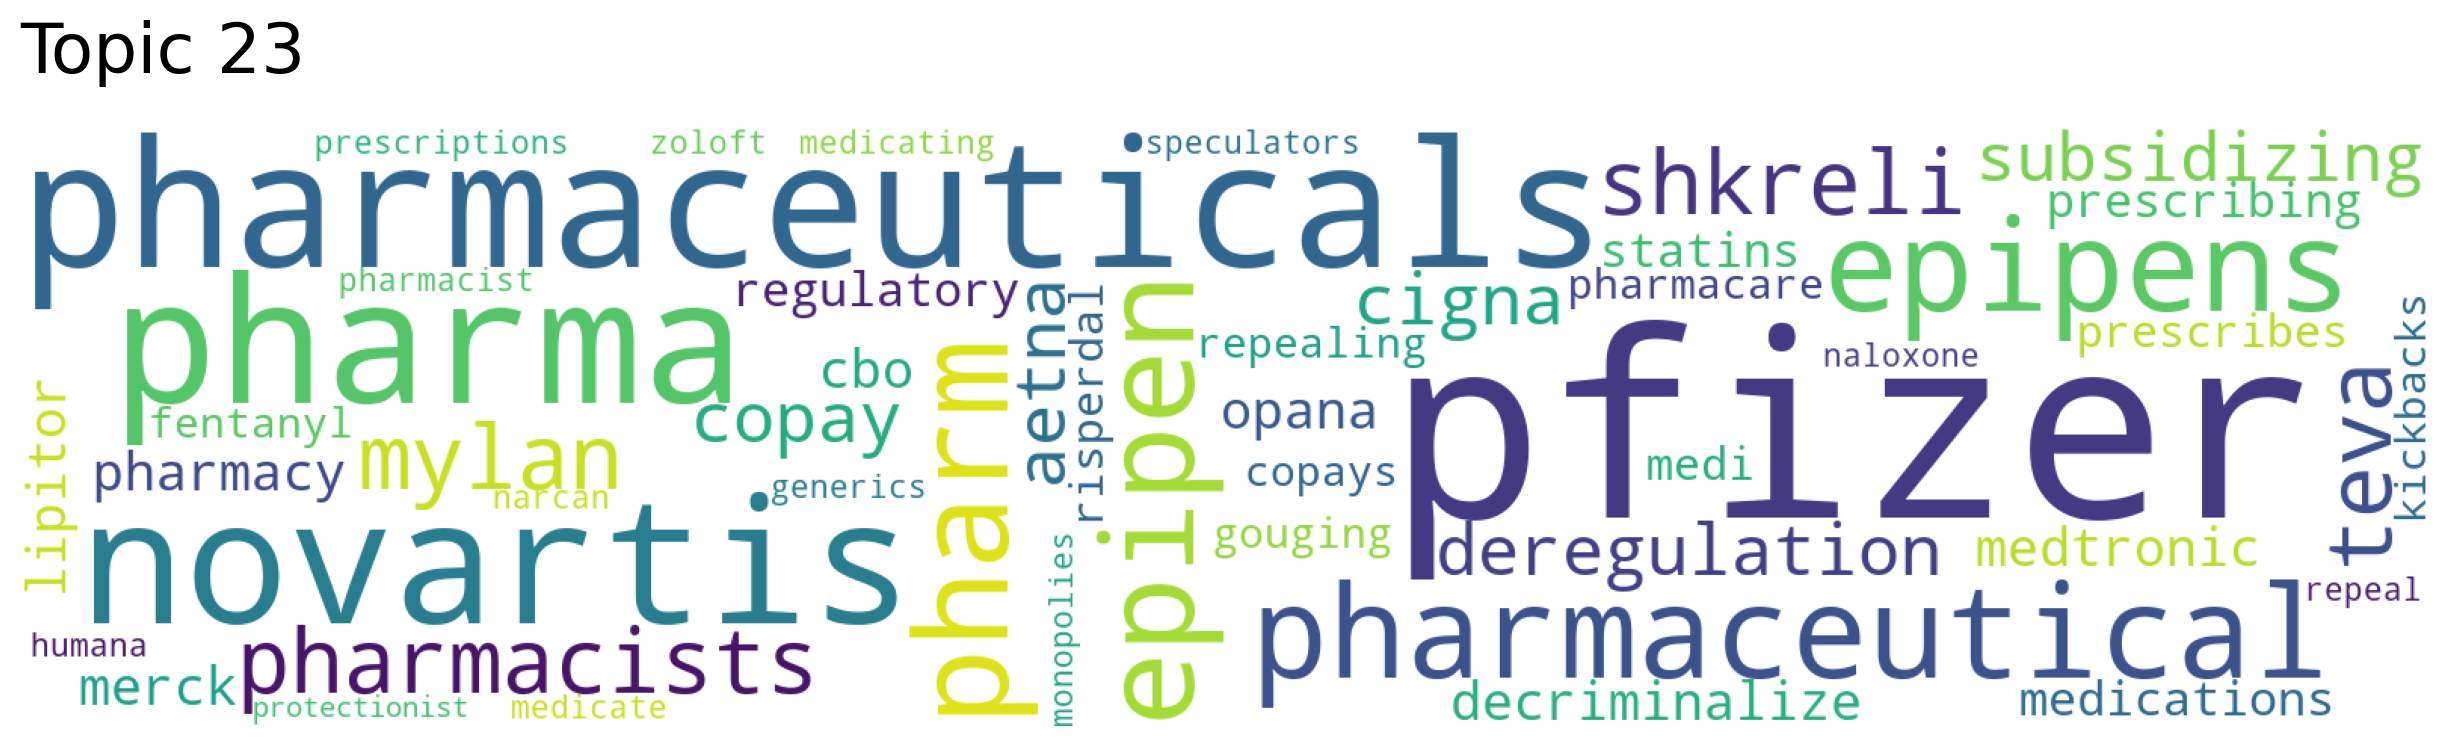

In [ ]:
model.generate_topic_wordcloud(23, background_color='white')

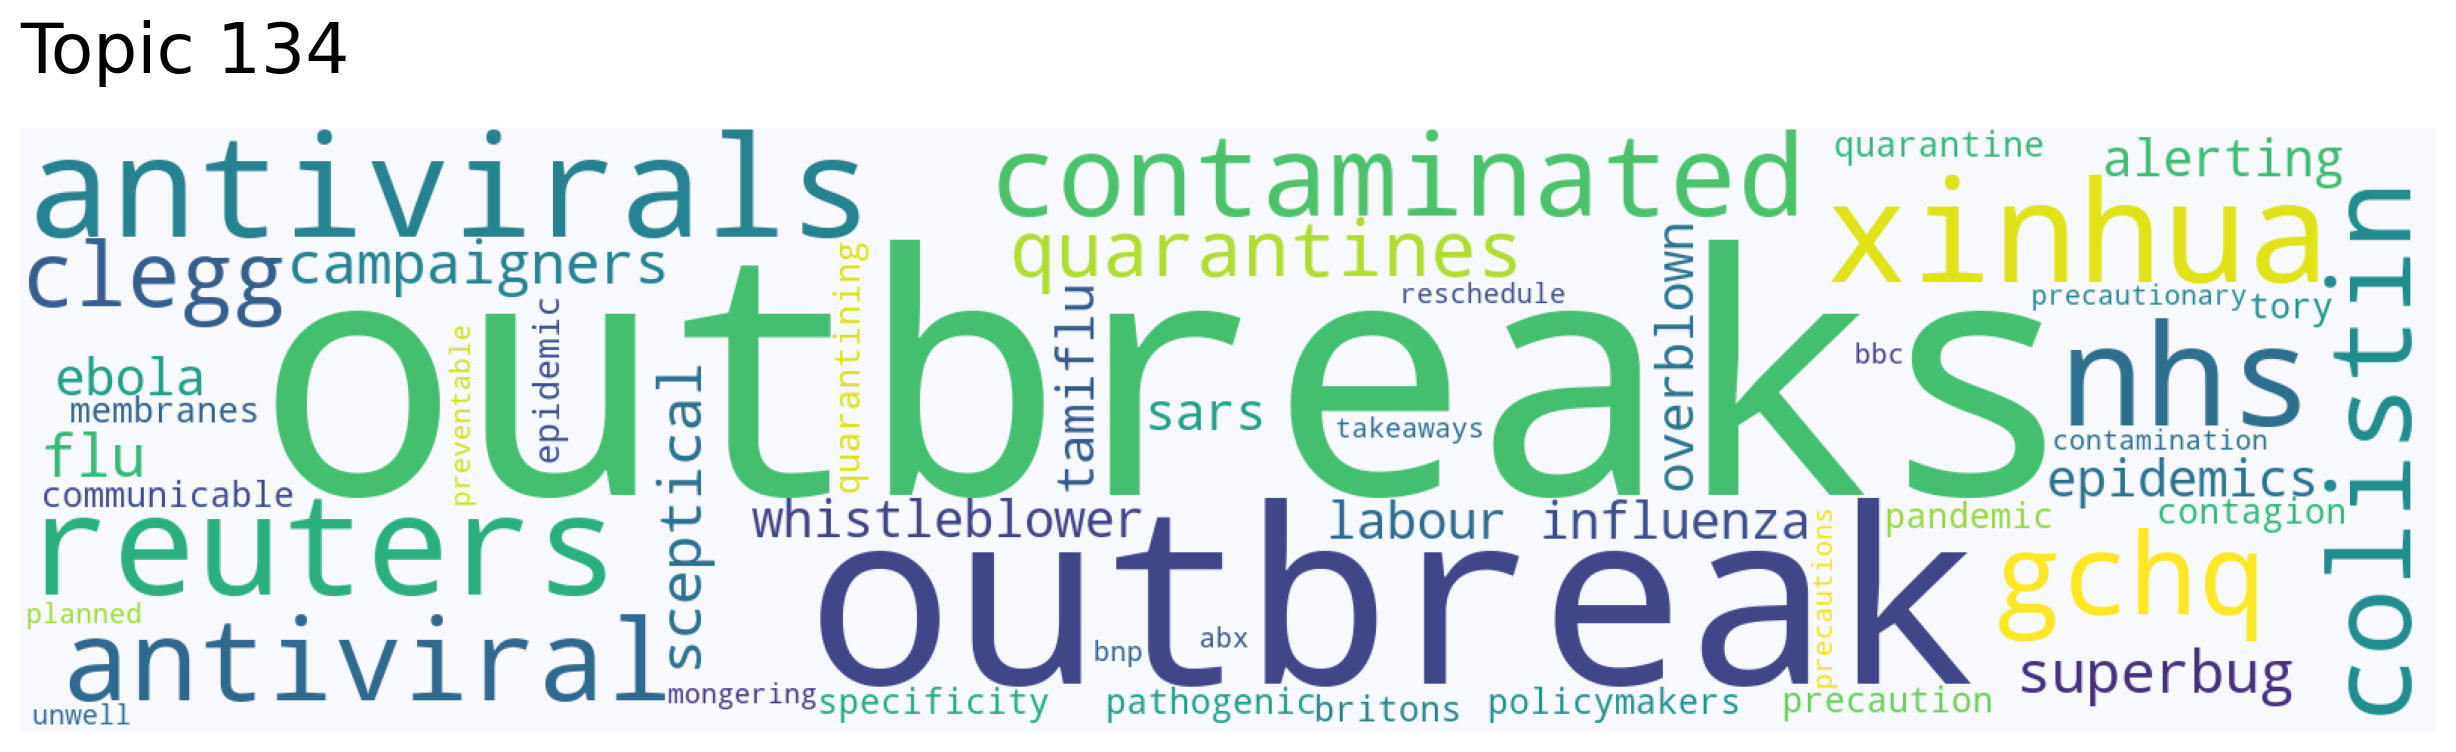

In [ ]:
model.generate_topic_wordcloud(134, background_color='ghostwhite')

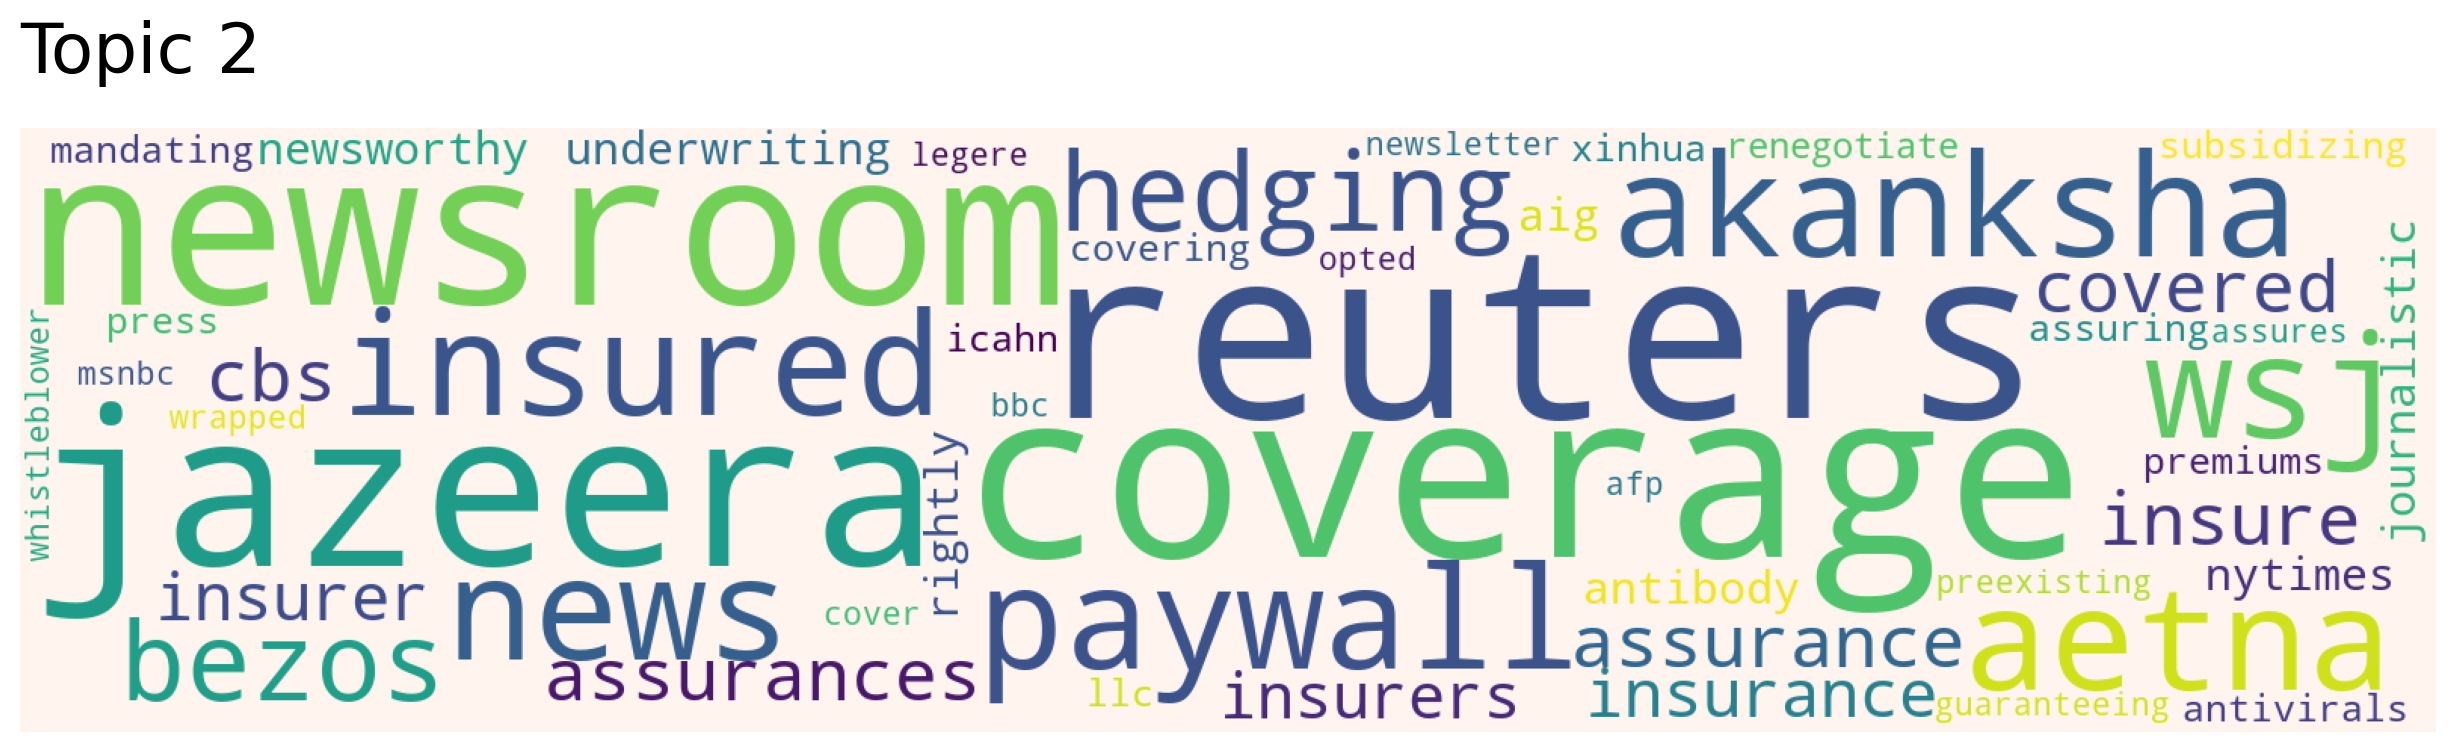

In [ ]:
model.generate_topic_wordcloud(2, background_color='seashell')


### Healthcare vs technology

In [ ]:
words, word_scores = model.similar_words(keywords=['healthcare'], keywords_neg=['technology'], num_words=20)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

health 0.37751804732368544
obamacare 0.35658790926333866
nhs 0.339233749626364
checkups 0.32883117644459486
heath 0.3273190154299531
murkowski 0.32229368848029216
lieberman 0.3093777864835377
copay 0.30559979085158806
medicaid 0.3030569967668925
mcconnell 0.2991358470197694
wellbeing 0.2963478701160367
nurse 0.2944455517488481
preexisting 0.2933861292562941
nurses 0.2921768415584882
deductibles 0.2914534877624497
ahca 0.28895841443120884
pelosi 0.2877701378177544
clinics 0.28704895010176845
february 0.2860512840465408
clinic 0.2851283964797967


### Technology vs healthcare

In [ ]:
words, word_scores = model.similar_words(keywords=['technology'], keywords_neg=['healthcare'], num_words=20)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

technological 0.46833858110927884
technologically 0.40171053676081825
technique 0.3812133934789836
technologies 0.3618386649223043
techniques 0.3512360842992331
technical 0.3400793908387809
tech 0.3288023769896085
utilized 0.21376202882507905
selective 0.20960493712781722
material 0.189944071683885
photographic 0.18162056761743506
production 0.18109894192943227
shied 0.18035077419884368
instruments 0.18005965338776148
instrument 0.17945017874597757
sync 0.17894305195384677
seeding 0.17875728106890973
device 0.17795527987253396
giphy 0.1757633436407489
drift 0.17400642739033084


### Prepare queries

In [ ]:
query1 = 'A while ago, probably less than 2 years ago, I saw a youtube video of Joe Rogan interviewing a female doctor, talking about the benefits of vitamin D. I wonder what her name is.'
query2 = 'Who are the subject matter experts in dead sea scrolls, and are also highly skilled in machine learning?'
query3 = 'Who is the author of Industrial Society and Its Future?'

### Query documents

In [ ]:
documents, doc_scores, doc_ids = model.query_documents(
    query=query1,
    num_docs=10,
    return_documents=True
)
print(documents)
print(doc_scores)
print(doc_ids)

['chinese researcher announced that he edited the dna of two twin girls born earlier this month to make them naturally resistant to hiv and other diseases if the research turns out to be legit these babies would be the first in the world to be born with an edited genome but the scientific community has had largely negative reactions and it still not clear whether the claim is valid on this episode of the vice guide to right now podcast we get the facts from motherboard reporter daniel oberhaus you can catch the vice guide to right now podcast on acast google play apple podcasts stitcher or wherever you get your podcasts and sign up for our newsletter to get the best of vice delivered to your inbox daily'
 'trilobites she had series of bone fractures but when doctors did blood tests the supplements she took for treatment were nowhere to be found in year old lebanese woman had just immigrated to canada and went to see doctor she was hunched over and had limited mobility in her lower back

In [ ]:
df.iloc[doc_ids]

,Unnamed: 0,section_clean,title_clean,article_clean,date,num_words_per_article
6797,154791,tech by vice,this chinese researcher says the first crispr ...,chinese researcher announced that he edited th...,2018-11-28 21:26:00,129
94762,2148253,health,you need vitamin to live how could this woman ...,trilobites she had series of bone fractures bu...,2019-04-13 05:00:06,646
15325,261263,tech by vice,what happens when the fbi raids biological tes...,back in september when motherboard reporter sa...,2019-05-20 15:14:00,122
8298,190009,health news,average pregnant woman in may have poor nutrition,reuters health many pregnant women in the may ...,2019-06-21 00:00:00,523
42910,914061,health,non cow milk linked to shorter kids study sugg...,cnn children who drink dairy alternatives like...,2017-06-07,838
13316,245140,health,we meet black metal yoga instructor on today d...,on today episode of daily vice we meet melody ...,2016-03-28 04:00:00,67
61250,1250705,health news,low dairy consumption tied to risk of early me...,women in their early with the highest intake o...,2017-05-18,631
5750,131787,tech by vice,thomas morton shares the language of ramadan o...,on today episode of daily vice thomas morton s...,2016-03-23 15:17:00,85
68376,1395861,health news,vitamin levels tied to breast cancer survival,by andrew seaman reuters health for women diag...,2016-11-11,516
46919,981468,health,vitamin supplements don improve bone health st...,london cnn vitamin supplements do not improve ...,2018-10-05,681


In [ ]:
documents, doc_scores, doc_ids = model.query_documents(
    query=query2,
    num_docs=10,
    return_documents=True
)
print(documents)
print(doc_scores)
print(doc_ids)

['some people have so much faith in artificial intelligence that they believe it represents code based god others have argued it another over hyped tech that doesn live up to its sky high expectations if you re in the mood for some friday blasphemy and want to decide for yourself play the divine or benign quiz developed by developer tobias hermann in the quiz feeds you ten images of text on dead sea scrolls type aesthetic backdrop your job is to determine if line is actually from the bible or if it just nonsense generated by neural network according to the website the benign text is generated using recurrent neural network this is kind of computing system that digitally attempts to mimic the brain and uses loops that make it useful for analyzing language neural networks learn to produce new outputs like text or an image after being trained on large amount of input data in this case the bible after getting the first question wrong incorrectly attributed the text to the neural network re

In [ ]:
df.iloc[doc_ids]

,Unnamed: 0,section_clean,title_clean,article_clean,date,num_words_per_article
20259,359170,tech by vice,this neural network trained on the bible tries...,some people have so much faith in artificial i...,2018-10-19 16:51:00,317
1665,38830,tech by vice,teaching machines to detect fake news is reall...,one of the most difficult parts of limiting th...,2017-05-07 16:00:00,491
99309,2275006,tech by vice,deepmind ai beats human historians at decipher...,it pretty easy to figure out what mean if few ...,2019-10-22 12:00:00,404
26902,542876,tech,ai pioneer andrew ng says his new online cours...,lots of people will tell you they re nervous a...,2017-08-08,680
20900,379403,tech by vice,what makes job vulnerable to ai automation,when it comes to the would be ai jobocalypse t...,2017-12-21 19:00:00,696
93507,2100327,technology,is there smarter path to artificial intelligen...,for the past five years the hottest thing in a...,2018-06-20 16:27:52,1197
198,4925,tech by vice,busting the hype behind deep neural networks,many technologists who are not also neuroscien...,2016-01-18 11:00:00,486
104149,2447008,tech,ai is booming but general intelligence is stil...,trying to get handle on the progress of artifi...,2019-12-12 00:00:00,605
94076,2122518,technology,finally machine that can finish your sentence,completing someone else thought is not an easy...,2018-11-18 16:05:16,1190
92551,2067325,technology,building that can build,google and others fighting for small pool of r...,2017-11-05 13:37:12,1131


### Query topics

In [ ]:
topic_words, word_scores, topic_scores, topic_idx = model.query_topics(
    query=query1,
    num_topics=10
)
print(topic_idx)
for i, x in zip(topic_idx, topic_words):
    print(i, '-'.join(x))

[733 453 658 492 108 759   4 573 873 609]
733 vice-deputy-mhz-naltrexone-podcast-commentator-watchos-pol-microdosing-vp-cernovich-channel-commutes-untethered-meme-addiction-addictions-biden-concurrently-prescribed-inhibitors-ripa-lawmaker-berman-naloxone-podcasting-commute-radiofrequency-buprenorphine-lives-tapper-prescribing-tran-hirsch-channeling-dosage-doses-lifetime-thinners-patreon-rehabilitation-krieger-podcasts-npr-therapeutics-dosing-derided-warmbier-pharmacist-jenner
453 vitamin-multivitamins-supplementation-vitamins-supplements-nutritionist-resveratrol-folate-statin-supplement-nootropics-supplementing-naturopathic-nutritionally-folic-nutritionists-dietician-nutritional-osteoporosis-nutrient-creatine-healthiest-statins-niacin-dietitian-antioxidants-bpa-endocrinologist-antioxidant-homeopathy-triglycerides-deficient-epo-holistic-dha-deficiency-osteoarthritis-aspartame-nsaids-pseudoscience-glycemic-calcium-lipitor-turmeric-gummies-nutrients-nutrition-homeopathic-androgen-prescrib

In [ ]:
topic_words, word_scores, topic_scores, topic_idx = model.query_topics(
    query=query2,
    num_topics=10
)
print(topic_idx)
for i, x in zip(topic_idx, topic_words):
    print(i, '-'.join(x))


[290  89 354 322 255 270 166 341 331 578]
290 deepmind-alphago-neural-algorithms-generative-computational-ai-digitizing-chatbot-crispr-sift-captcha-driverless-tensorflow-supercomputer-crowdsourcing-openai-neuronal-supercomputers-algorithmic-darpa-cyborgs-replicate-algorithm-recreating-chatbots-robots-irobot-fmri-clustering-simulated-robotic-randomized-holograms-mosaic-ais-digitization-reconstruct-pixelated-qubits-adaptive-megapixel-simulating-supercomputing-nanoparticles-conceptually-implementations-neuron-innovating-enhance
89 deepmind-alphago-ai-robotic-irobot-driverless-ais-chatbot-crispr-robots-darpa-transhumanism-supercomputer-chatbots-cyborgs-computational-supercomputers-neural-nanotechnology-turing-openai-generative-breakthroughs-algorithms-synthesizer-algorithmic-robotics-crowdsourcing-qubits-graphene-neumann-computerized-robot-emergent-captcha-technologies-revolutionize-unmanned-biotechnology-automated-learns-seti-cyborg-singularity-futurist-supercomputing-transhumanist-stuxne

In [ ]:
topic_words, word_scores, topic_scores, topic_idx = model.query_topics(
    query=query3,
    num_topics=10
)
print(topic_idx)
for i, x in zip(topic_idx, topic_words):
    print(i, '-'.join(x))

[341 565 270 117 496 384 516 184 489 477]
341 automation-driverless-robots-irobot-automated-robotic-automating-robotics-foxconn-layoffs-workers-laborers-transhumanism-economists-unmanned-cyborgs-outsource-automate-jobless-redundancies-roomba-robot-alphago-technologists-ai-economist-worker-darpa-industrialized-outsourced-technicians-outsourcing-jobs-nanotechnology-employed-autonomous-unemployed-crispr-stagnation-computerized-looms-bots-fintech-employs-kiosks-futurist-shortages-machines-unemployment-autonomously
565 robots-robotics-foxconn-automation-irobot-robotic-automated-xinhua-roomba-factories-automating-manufactures-driverless-protectionist-robot-manufacturing-outsource-automakers-protectionism-robo-outsourcing-tsla-alibaba-baidu-gao-rmb-outsourced-automate-china-cyborgs-hyperloop-alphago-nanotechnology-uaw-reactors-industrialized-snapdeal-gigafactory-deepmind-innovating-innovate-graphene-manufacturers-renminbi-unmanned-tianjin-layoffs-darpa-machines-biotech
270 irobot-ai-driverles

### Topic 117

117 irobot-dystopia-transhumanism-cyberpunk-dystopian-westworld-irreversible-contagion-frailty-futurist-transhumanist-interstellar-limitless-terminator-futuristic-elysium-alien-cryonics-tropes-premise-singularity-robotic-microbe-herzog-expanse-cyborgs-trope-apocalyptic-crispr-blade-soylent-jaws-microbial-simulated-utopian-spielberg-inhuman-bioengineering-metropolis-earthlings-kaufman-leapt-irradiated-criterion-primer-ultraviolet-divergent-antagonist-veer-utopia


In [ ]:
show_topic_docs(topic_num=117, num_docs=10)

,id,score,doc
0,6337,0.823152,life is bleak and at the end of long day many of us just want to turn our brains off and watch some netflix but there so much stuff on t...
1,8661,0.821529,love life alpha the first of several short plays shown at the sci fest la festival opens conventionally enough with harried man setting ...
2,17664,0.814641,it was within the hallowed basement of the east village lovecraft bar thousands beginning their migration to washington dc to march my g...
3,14834,0.800888,these columns contain spoilers for blade runner blade runner is good blade runner it is very very good possibly better than blade runner...
4,7672,0.795129,one of the opening shots in the first trailer for blade runner the sequel to ridley scott sci fi classic shows something that the origin...
5,20513,0.793048,nothing dates movie more than the words in the not too distant future especially if that future happens to fall within our lifetimes bec...
6,19406,0.791192,humanity is outgunned outmatched and enslaved in gritty new short film from south african south african science fiction wunderkind neill...
7,15408,0.783716,there are seemingly two inescapable realities for big budget filmmakers in you have to use existing intellectual property and you must p...
8,5573,0.781897,imagine jurassic park but instead of genetically modified dinosaurs you have artificially intelligent robots who have been developed to ...
9,17182,0.775984,the lovechild of deadpool director tim miller and fight club director david fincher netflix love death and robots is an part science fic...


### Reduce to 100 topics (~6 min)

In [ ]:
topiclist = model.hierarchical_topic_reduction(100)

In [ ]:
for i, topicgroup in enumerate(topiclist):
    print(f'Topicgroup {i} size: {len(topicgroup)} topics')

Topicgroup 0 size: 12 topics
Topicgroup 1 size: 28 topics
Topicgroup 2 size: 13 topics
Topicgroup 3 size: 40 topics
Topicgroup 4 size: 9 topics
Topicgroup 5 size: 13 topics
Topicgroup 6 size: 38 topics
Topicgroup 7 size: 18 topics
Topicgroup 8 size: 5 topics
Topicgroup 9 size: 20 topics
Topicgroup 10 size: 6 topics
Topicgroup 11 size: 4 topics
Topicgroup 12 size: 7 topics
Topicgroup 13 size: 5 topics
Topicgroup 14 size: 13 topics
Topicgroup 15 size: 14 topics
Topicgroup 16 size: 4 topics
Topicgroup 17 size: 11 topics
Topicgroup 18 size: 13 topics
Topicgroup 19 size: 7 topics
Topicgroup 20 size: 11 topics
Topicgroup 21 size: 12 topics
Topicgroup 22 size: 8 topics
Topicgroup 23 size: 13 topics
Topicgroup 24 size: 9 topics
Topicgroup 25 size: 9 topics
Topicgroup 26 size: 11 topics
Topicgroup 27 size: 14 topics
Topicgroup 28 size: 14 topics
Topicgroup 29 size: 10 topics
Topicgroup 30 size: 9 topics
Topicgroup 31 size: 7 topics
Topicgroup 32 size: 4 topics
Topicgroup 33 size: 3 topics
Topic

In [ ]:
topic_words, word_scores, topic_idx = model.get_topics()

In [ ]:
for t in topiclist[39]:
    print(t, '-'.join(topic_words[t]))

83 uefa-ucl-carvalho-inter-bundesliga-ligue-juventus-allianz-gillett-stadia-abate-stewards-sporting-organisers-pep-fixture-fixtures-mou-postponed-soccer-copa-relegated-liga-weiser-football-stoppage-silva-vieira-basel-rested-blackburn-mellanox-etihad-playoffs-prelim-fifa-pundits-precautionary-mendes-costas-matteo-conte-arsenal-maldonado-hazard-suspensions-collymore-leagues-schengen-organizers
659 canberra-rudd-australians-abbott-turnbull-queensland-qantas-tasmania-auckland-xinhua-sydney-pollutants-australian-macquarie-quarantines-endanger-melbourne-telstra-brisbane-precaution-evacuations-colistin-quarantine-alarmist-perilous-typhoid-immune-pollutant-nz-jeopardize-perth-tamiflu-dengue-beijing-migrants-preventable-quarantined-fiji-lankan-aboriginal-vaccinating-papua-mongering-cautions-christchurch-cbd-sars-warn-safely-declare
449 rugby-queensland-hodge-afl-vickery-canberra-cowan-gillett-pearce-prelim-dugan-cricket-tonga-tasmania-nz-lankan-qantas-wilkinson-brisbane-maloney-australians-trot

In [ ]:
for t in topiclist[52]:
    print(t, '-'.join(topic_words[t]))

687 reuters-afp-forecasted-march-nyse-xinhua-anc-cnbc-forecast-bullish-intraday-bitfinex-etf-tsla-forecasts-feb-wsj-volatility-selloff-standby-uganda-angola-okcoin-predicts-cme-assange-wikileaks-reschedule-postponed-ftse-analysts-predicted-unconfirmed-bearish-xrp-nikkei-rescheduled-monday-nasdaq-nvda-coindesk-warns-reportedly-alarmist-outage-forecasting-zambia-huobi-johannesburg-noaa
163 reuters-press-news-march-xinhua-journalistic-planned-coverage-wsj-newsroom-sources-paywall-sourced-cancelled-akanksha-project-mar-ngo-complicit-tap-nytimes-withholding-alternative-npr-newsworthy-msnbc-unconfirmed-cnn-protestors-militants-protesters-furloughed-rescheduled-cancelling-forecast-canceled-halted-protesting-reschedule-journalists-shutting-strike-closings-plos-alerts-unreliable-infotainment-april-hydraulic-spring
291 agm-reuters-shareholders-reschedule-xinhua-tsla-meetings-ipo-annual-wsj-convene-meeting-tianjin-guarantees-shareholder-briefing-press-coverage-icahn-preventive-briefings-closings-

## Try topic phrases (~15 min)

In [ ]:
model_phrases = Top2Vec(docs, embedding_model='universal-sentence-encoder', ngram_vocab=True)

2022-05-10 17:06:22,559 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
2022-05-10 17:13:40,981 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2022-05-10 17:13:48,975 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-05-10 17:19:03,267 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2022-05-10 17:20:54,084 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2022-05-10 17:21:01,308 - top2v

In [ ]:
print('Num topics:', model_phrases.get_num_topics())

Num topics: 867


### Save model

In [ ]:
model_phrases.save('top2vec.univ-sent-enco.phrases.t2v')

### Top 100 "technology"

In [ ]:
topic_words, word_scores, topic_scores, topic_nums = model_phrases.search_topics(keywords=['technology'], num_topics=100)
for i, x in zip(topic_nums, topic_words):
    print(i, '-'.join(x))

141 techcrunch disrupt-technology columnist-wearable technology-wearable technologies-esim technology-nascent technology-pengqi technology-technologically sophisticated-cashierless technology-dynavax technologies-slowing smartphone-jumia technologies-technological breakthroughs-hanwang technology-technologies hwt-mit technology-techcrunch-tech columnist-emerging technologies-nanometer technology-wiretapping-innovative technologies-live tweeting-forescout technologies-gty technology-smartisan technology-idreamsky technology-naura technology-engadget-transformative technologies-bioservo technologies-singulus technologies-technologically advanced-agilent technologies-technological advancements-mit media-technologies-eavesdrop on-wearable gadgets-patented technology-dbv technologies-dahua technology-micro blogging-qlik technologies-technologically-sensing technologies-technological breakthrough-technological revolution-wearable computers-technologies htt
135 iot devices-wearable gadgets-we

### Healthcare vs technology

If we use both positive and negative keywords, it makes very specific, "narrow-focused" categorizations. Surprisingly, same case even when only positive or only negative. So I tried phrases for the "keyword" and

In [ ]:
t1 = 'healthcare'
t2 = 'technology'

for kpos, kneg in [(t1, t2), (t2, t1)]:
  words, word_scores = model_phrases.similar_words(keywords=[kpos], keywords_neg=[kneg], num_words=20)
  print('-'*80)
  print(f'{kpos} vs {kneg}')
  for word, score in zip(words, word_scores):
      print(f"{word} {score}")

--------------------------------------------------------------------------------
healthcare vs technology
msmb healthcare 0.592589613099336
yihua healthcare 0.5843381472729294
cadila healthcare 0.5841380818221151
ihh healthcare 0.5837968229049753
humanwell healthcare 0.5808191559778165
viiv healthcare 0.5791456088132676
andlauer healthcare 0.5782751539911456
biosilu healthcare 0.5775877450496955
dallah healthcare 0.5753403325361981
amn healthcare 0.5715221004373494
udg healthcare 0.5693490036971051
hca healthcare 0.5672195550089371
abano healthcare 0.5624016104791906
nidda healthcare 0.5593598513275332
tenet healthcare 0.5544079909424685
viemed healthcare 0.5528377178347481
lippo healthcare 0.549163343440614
celltrion healthcare 0.5475736593586593
zenitas healthcare 0.5439072327575549
health care 0.5427247702438174
--------------------------------------------------------------------------------
technology vs healthcare
technology miit 0.535483584183636
rentian technology 0.526138699747

In [ ]:
words, word_scores = model_phrases.similar_words(keywords=['healthcare'], num_words=20)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

health care 0.9376276889151378
dallah healthcare 0.9097819428224831
humanwell healthcare 0.9019497339924691
viiv healthcare 0.895628329513239
japara healthcare 0.8839490708784699
udg healthcare 0.8776901629074843
andlauer healthcare 0.8768093112705244
zenitas healthcare 0.8723302552656766
hca healthcare 0.8716878857651809
amn healthcare 0.8624637817765481
ihh healthcare 0.8612804039009043
abano healthcare 0.8604412472525476
healthcare system 0.8592907682937577
tejnaksh healthcare 0.8591530199167796
yihua healthcare 0.8588700912369669
nidda healthcare 0.8579287735175041
intermountain healthcare 0.8553871155127075
msmb healthcare 0.8513023237397074
lippo healthcare 0.8500898520208748
cadila healthcare 0.8463660363193302


In [ ]:
words, word_scores = model_phrases.similar_words(keywords=['technology'], num_words=20)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

amperex technology 0.8762480204275086
idreamsky technology 0.8693229214545042
technology dlt 0.8576205335239452
gty technology 0.8522245317359989
hanwang technology 0.8518817389543306
technological 0.8515944659857367
optoelectronics technology 0.8482789900064543
technology miit 0.8404725640317853
bytedance technology 0.836085721421404
technology underpinning 0.829050554619762
cashierless technology 0.8234101003126932
dahua technology 0.8105081956879042
rentian technology 0.8071443737664664
nuflare technology 0.8071063063111927
technology officer 0.7929990041252148
nascent technology 0.7915054331625249
technologies 0.7838878913209386
qihoo technology 0.7799332786553799
pengqi technology 0.773663276982929
smartisan technology 0.7719482936914455


In [ ]:
words, word_scores = model_phrases.similar_words(keywords=[t1, t2], num_words=20)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

health care 0.7647488458534477
technological 0.7114174151942512
dallah healthcare 0.708661859596015
healthcare system 0.7080064946220577
amperex technology 0.7048875480399266
healthcare facilities 0.7048512114852472
technologies 0.7022918380612184
japara healthcare 0.7011749992634966
idreamsky technology 0.7007489798023815
humanwell healthcare 0.6954167434002839
gty technology 0.6903805379173552
viiv healthcare 0.6889011208766881
hanwang technology 0.6873610145809743
optoelectronics technology 0.6852102727374101
zenitas healthcare 0.6847962702589446
technology dlt 0.6800340606865949
tech 0.6789881837356929
udg healthcare 0.673868706649672
technology underpinning 0.6719114190503035
intermountain healthcare 0.6714626797168839


In [ ]:
words, word_scores = model_phrases.similar_words(keywords=['health', 'tech'], num_words=20)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

tech luminaries 0.7072364380277988
healthcare 0.6939506579674235
tech abetted 0.6828578428704355
avadim health 0.6700704816044298
tech tycoons 0.6672236255113075
health care 0.6632854308841154
technology 0.6599455245491521
castlight health 0.6597591548360683
tech industry 0.6571255965699058
andon health 0.6549834842637886
opko health 0.6499550317581588
tech darlings 0.6494938574662823
sunnybrook health 0.6467752156779522
estia health 0.6387182632137769
aleafia health 0.6322364078758368
iora health 0.627565873815086
tech sector 0.6274876607920508
tech companies 0.6269521011031896
puretech health 0.6246879394136367
evidation health 0.6240588289408748


### Query documents

In [ ]:
documents, doc_scores, doc_ids = model_phrases.query_documents(
    query=query1,
    num_docs=10,
    return_documents=True
)
print(documents)
print(doc_scores)
print(doc_ids)

2022-05-10 18:40:02,621 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model


['chinese researcher announced that he edited the dna of two twin girls born earlier this month to make them naturally resistant to hiv and other diseases if the research turns out to be legit these babies would be the first in the world to be born with an edited genome but the scientific community has had largely negative reactions and it still not clear whether the claim is valid on this episode of the vice guide to right now podcast we get the facts from motherboard reporter daniel oberhaus you can catch the vice guide to right now podcast on acast google play apple podcasts stitcher or wherever you get your podcasts and sign up for our newsletter to get the best of vice delivered to your inbox daily'
 'trilobites she had series of bone fractures but when doctors did blood tests the supplements she took for treatment were nowhere to be found in year old lebanese woman had just immigrated to canada and went to see doctor she was hunched over and had limited mobility in her lower back

### Query topics

In [ ]:
topic_words, word_scores, topic_scores, topic_idx = model_phrases.query_topics(
    query=query1,
    num_topics=10
)
print(topic_idx)

[717 636 375 489 741   7 498 580 865 565]


In [ ]:
print(topic_words[0])

['vice' 'vice guide' 'vice com' 'vice chairwoman' 'vice ca'
 'vice delivered' 'vice provost' 'vice magazine' 'coping vice'
 'tippingpoint vice' 'vice premier' 'vice chair' 'vice chairman'
 'former vice' 'vice president' 'vice chancellor' 'executive vice'
 'vice presidents' 'senior vice' 'vice dean' 'vice admiral' 'tonic vice'
 'deputy' 'addiction treatment' 'vice versa' 'mhz' 'joe rogan'
 'meme insider' 'former vp' 'daily commutes' 'deputy chairwoman'
 'motherboard documentary' 'watchos' 'daily commute' 'podcast'
 'naltrexone' 'vp' 'lichtenfeld deputy' 'tnf inhibitors' 'dr lauer'
 'megahertz mhz' 'weekly podcast' 'prescribed topical' 'mhz mhz'
 'commentator' 'daily dose' 'pol' 'podcast narcotica' 'mhz frequency'
 'frequency airwaves']


### Reduce to 10 topics (>5 min)

In [ ]:
topiclist_phrases = model_phrases.hierarchical_topic_reduction(10)

In [ ]:
totalsize = 0
for i, topicgroup in enumerate(topiclist_phrases):
    currentsize = len(topicgroup)
    totalsize += currentsize
    print(f'Topicgroup {i} size: {currentsize} topics')
print(f'Total size: {totalsize} topics')

Topicgroup 0 size: 94 topics
Topicgroup 1 size: 176 topics
Topicgroup 2 size: 114 topics
Topicgroup 3 size: 82 topics
Topicgroup 4 size: 108 topics
Topicgroup 5 size: 47 topics
Topicgroup 6 size: 60 topics
Topicgroup 7 size: 42 topics
Topicgroup 8 size: 86 topics
Topicgroup 9 size: 58 topics
Total size: 867 topics


In [ ]:
print('Top 10 topic sizes')
print('Original before reduced:', model_phrases.get_topic_sizes()[0][:10])
print('After reduced to 10:', model_phrases.get_topic_sizes(reduced=True)[0])

Top 10 topic sizes
Original before reduced: [3003 1377 1295 1186 1129 1074 1042 1016  978  924]
After reduced to 10: [23987 17206 14406 13841 11884 11213 10925  9532  8834  7854]


In [ ]:
topicphrases_words, wordphrases_scores, topicphrases_idx = model_phrases.get_topics()

In [ ]:
for t in topiclist_phrases[7]:
    print(t, '-'.join(topicphrases_words[t]))

340 zuckerberg testified-zuckerberg apologized-zuckerberg defended-gleicher facebook-zuckerberg-data protection-privacy concerns-zuckerberg testimony-anonymized data-data breach-mark zuckerberg-encryption protects-encryption safeguards-owned whatsapp-mr zuckerberg-reuters telenor-randi zuckerberg-privacy scandal-ppi users-facebook coo-eu antitrust-subsidiaries whatsapp-biometric data-reuters jiangsu-privacy campaigners-facebook messenger-privacy watchdog-encryption backdoors-nsa hackers-privacy legislation-chan zuckerberg-equifax hack-encryption-reuters coloplast-consumer privacy-sue equifax-privacy laws-reuters pharmacolog-privacy advocates-eu regulators-facebook fb-reuters purapharm-privacy safeguards-data breaches-gchq-reuters ipsos-reuters joincare-reuters biofrontera-nielsen data-reuters osmozis
40 zuckerberg testified-zuckerberg apologized-zuckerberg defended-zuckerberg testimony-zuckerberg-mark zuckerberg-randi zuckerberg-mr zuckerberg-chan zuckerberg-gleicher facebook-facebook 

## Train the model with doc2vec embedding (>26min. Not completed)

Already 26 min. I'm stopping it.

In [ ]:
model_doc2vec = Top2Vec(docs, embedding_model='doc2vec')

2022-05-10 07:03:28,593 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2022-05-10 07:06:17,941 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


KeyboardInterrupt: ignored